In [2]:
import random
import math
from abc import ABC, abstractmethod
import torch
import numpy as np

Remember that each node, is a logistic regression in and out of itself


# Dataset with 3 features and 2 classes


In [3]:
x = np.random.rand(1000, 3)
y = np.array([1 if np.sum(i) > 1.5 else 0 for i in x])

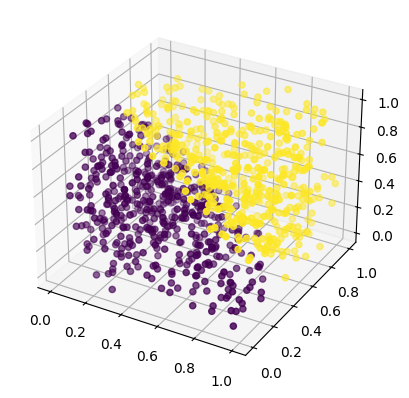

In [5]:
# plot x and y
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)
plt.show()

# Dense Neural Network from Scratch


In [122]:
import random


class Node:
    def __init__(self, input_features_num: int, activation: str):
        self.weights = [random.random() for _ in range(input_features_num)]
        self.bias = random.random()
        self.activation = self.sigmoid if activation == "sigmoid" else self.relu

        self.input_cache = []
        self.z_cache = []
        self.activation_cache = []

    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))

    def relu(self, x):
        return max(0, x)

    def forward(self, layer_input: list):
        assert len(layer_input) == len(
            self.weights
        ), "Number of weights must be equal to number of input features"
        z = sum(i * w for i, w in zip(layer_input, self.weights)) + self.bias
        a = self.activation(z)

        self.input_cache = layer_input.copy()
        self.z_cache = z
        self.activation_cache = a

        return a

    def backward(self, output_gradient, learning_rate: float):
        if self.activation == self.sigmoid:
            d_activation = self.activation_cache * (1 - self.activation_cache)
        elif self.activation == self.relu:
            d_activation = 1 if self.z_cache > 0 else 0

        d_z = output_gradient * d_activation
        d_w = d_z * np.array(self.input_cache)
        d_b = d_z
        # Update weights and bias
        self.weights = [w - learning_rate * dw for w, dw in zip(self.weights, d_w)]
        self.bias -= learning_rate * d_b

        # Return gradient w.r.t. input for further backpropagation in the network
        input_gradient = [d_z * w for w in self.weights]
        return input_gradient

In [131]:
class DenseLayer:
    def __init__(self, input_features_num: int, nodes_num: int, activation: str):
        self.activation = activation
        self.nodes = [Node(input_features_num, activation) for _ in range(nodes_num)]

    def forward(self, input: list):
        return [node.forward(input) for node in self.nodes]

    def backward(self, error: list, learning_rate: float):
        error = [
            node.backward(error, learning_rate)
            for error, node in zip(error, self.nodes)
        ]
        return error[0]

In [134]:
network = [
    DenseLayer(3, 4, "relu"),
    DenseLayer(4, 3, "relu"),
    DenseLayer(3, 1, "sigmoid"),
]

for epoch in range(1000):
    for i in range(len(x)):
        # Forward pass
        input = x[i]
        for layer in network:
            input = layer.forward(input)

        # Compute loss
        loss = (input[0] - y[i]) ** 2
        # print(f"Prediction: {input[0]}, True: {y[i]}")
        # print(f"Loss: {loss}")
        # Backward pass
        error = [2 * (input[0] - y[i])]
        for layer in reversed(network):
            error = layer.backward(error, 0.01)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")
        # calculate accuracy
        correct = 0
        for i in range(len(x)):
            input = x[i]
            for layer in network:
                input = layer.forward(input)
            if (input[0] > 0.5 and y[i] == 1) or (input[0] <= 0.5 and y[i] == 0):
                correct += 1
        print(f"Accuracy: {correct / len(x)}")

Epoch 0, Loss: 0.18587164291516486
Accuracy: 0.509
Epoch 100, Loss: 1.8923521235009353e-13
Accuracy: 0.993
Epoch 200, Loss: 5.3059950529323676e-20
Accuracy: 0.995
Epoch 300, Loss: 2.0221631014360306e-25
Accuracy: 0.995
Epoch 400, Loss: 6.66972145872096e-31
Accuracy: 0.992
Epoch 500, Loss: 2.5093203841893572e-39
Accuracy: 0.99
Epoch 600, Loss: 7.205513730860432e-47
Accuracy: 0.99
Epoch 700, Loss: 4.961450354199833e-58
Accuracy: 0.991
Epoch 800, Loss: 1.0350823713019004e-77
Accuracy: 0.983
Epoch 900, Loss: 2.5653008366467075e-106
Accuracy: 0.985
